In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='Survived', ylabel='count'>

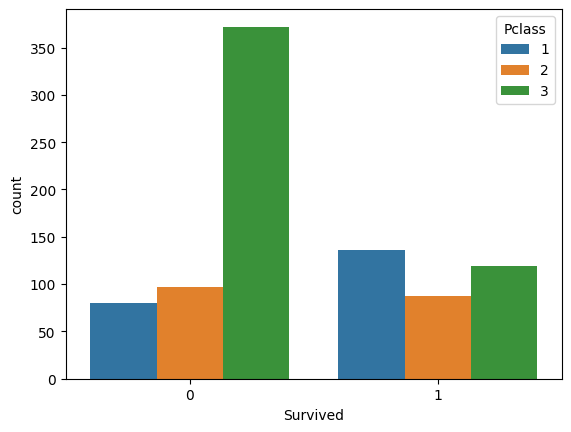

In [6]:
sns.countplot(x = 'Survived', data = df_train, hue = 'Pclass')

<AxesSubplot: xlabel='Age', ylabel='Count'>

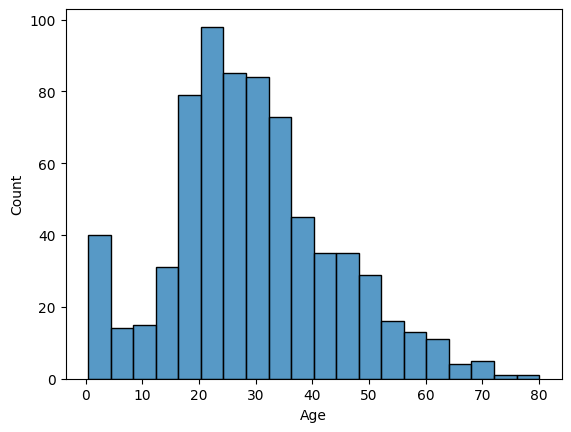

In [7]:
sns.histplot(df_train['Age'], kde= False)

In [8]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

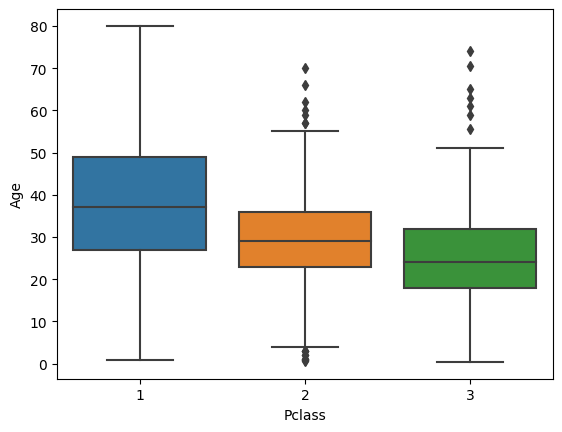

In [9]:
sns.boxplot(x ='Pclass', y= 'Age', data = df_train)

So older people have more wealth and thus they are in first class. 

## So we have missing values in age column. We should fill in these values with the average age of the entire dataset.

In [10]:
print(df_train[df_train['Pclass'] == 1]['Age'].mean())
print(df_train[df_train['Pclass'] == 2]['Age'].mean())
print(df_train[df_train['Pclass'] == 3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [11]:
def fill_the_na_values(cols):
  age= cols[0]
  pclass = cols[1]

  if pd.isna(age):
    if pclass == 1:
      return round(df_train[df_train['Pclass'] == 1]['Age'].mean())
    if pclass == 2:
      return round(df_train[df_train['Pclass'] == 2]['Age'].mean())
    if pclass == 3:
      return round(df_train[df_train['Pclass'] == 3]['Age'].mean())
  else: 
    return age

df_train['Age'] = df_train[['Age','Pclass']].apply(fill_the_na_values, axis=1)

In [12]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

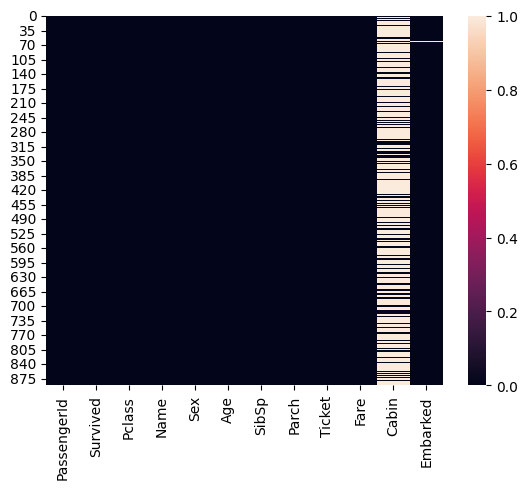

In [13]:
sns.heatmap(df_train.isna())

In [14]:
df_train.drop(['Cabin'],axis=1, inplace=True)

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
df_train.dropna(inplace= True)

In [17]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df_train.drop(['PassengerId','Name','Ticket'], axis= 1, inplace = True)

In [19]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [21]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
df_train['Sex'] = df_train['Sex'].replace({'male': 0, 'female': 1})

In [23]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [24]:
Embarked = pd.get_dummies(df_train.Embarked, prefix= 'Embarked')
Embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [25]:
df_train = df_train.join(Embarked)  
df_train.drop(['Embarked'],axis=1,inplace = True)

In [26]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

x = df_train.drop('Survived', axis=1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

This code imports two modules from the Scikit-learn library: MinMaxScaler and train_test_split.

The MinMaxScaler class is used for feature scaling, which means that it transforms the features to be within a specific range. This is important because some machine learning algorithms can be sensitive to the scale of the input features, and scaling them can improve the performance of the model.

The train_test_split function is used for splitting a dataset into two separate sets: a training set and a testing set. This is important in machine learning because it allows us to train a model on a portion of the data and then test its performance on data that it has not seen before.

The code then creates the variables "x" and "y". "x" contains all the features from the "df_train" dataframe except the "Survived" column, and "y" contains only the "Survived" column.

The next line of code uses the train_test_split function to split the data into training and testing sets. It assigns 90% of the data to the training set and 10% to the testing set. The training set will be used to train the model, while the testing set will be used to evaluate its performance.

The resulting variables are "x_train", "x_test", "y_train", and "y_test", which contain the features and target variable for the training and testing sets, respectively.





In [28]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

This code block performs the Min-Max scaling operation used for normalizing data.

The MinMaxScaler class rescales features to a given range, particularly between the minimum and maximum values of the data. For example, rescaling can be done to a range of 0-1.

The fit_transform() method applies the Min-Max scaler to the data and rescales the data to a range of 0-1. The fit() method only performs the scaling operation on the data and does not return the rescaled data.

In this code block, the fit_transform() method is called on the training data x_train and the results are assigned to x_train. Then, the same scaling is applied to the test data x_test and the results are assigned to x_test. This ensures that the data is scaled consistently between the training and test sets.

In [29]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)

predictions = svm.predict(x_test)

This code block uses the Support Vector Machine (SVM) algorithm from the sklearn library to train a classification model and make predictions on test data.

First, an SVM object is created from the SVC class and this object is fitted to the training data (x_train, y_train). The SVM creates a model that can perform classification on these training data.

Next, this model is used to make predictions on the x_test data. The predictions are assigned to a variable called 'predictions'. The predictions are compared with the y_test values that determine the classes of the dataset, and the accuracy of the model is evaluated.

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        56
           1       0.86      0.73      0.79        33

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89

[[52  4]
 [ 9 24]]


This code is used to evaluate the classification performance of the model.

The 'classification_report' function returns a report containing different metrics used to measure the accuracy of the classification model. These metrics include measurements such as accuracy, precision, recall, and F1 score.

The 'confusion_matrix' function, on the other hand, returns a matrix used to evaluate the performance of the classification model. This matrix includes the number of data points based on the actual class and predicted class values. This matrix can also calculate the number of correctly classified data.

The above code is used to evaluate the performance of the trained SVM model on the test data. First, the 'classification_report' function is called with the 'y_test' and 'predictions' parameters, which returns a report containing different classification metrics to measure the accuracy of the model. Second, the 'confusion_matrix' function is called with the 'y_test' and 'predictions' parameters, which returns a matrix showing the classification performance on the test data based on actual and predicted class values.

y_test contains the true answers for the test dataset. The trained model makes predictions using x_test data. These predictions are compared with the true answers (y_test) to evaluate the accuracy of the model. classification_report and confusion_matrix functions are used to analyze the differences between the true answers (y_test) and predictions and to evaluate the performance of the classification model.

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0,5,1,10,50,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001,0.000001]}

grid = GridSearchCV(SVC(),param_grid,refit = True,verbose= 2)
grid.fit(x_train,y_train)
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .......................................C=0, gamma=1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0, gamma=0.1; total time=   0.0s
[CV] END ....................................C=0, gamma=0.01; total time=   0.0s
[CV] END ....................................C=

In [32]:
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        56
           1       0.79      0.82      0.81        33

    accuracy                           0.85        89
   macro avg       0.84      0.85      0.84        89
weighted avg       0.86      0.85      0.85        89

[[49  7]
 [ 6 27]]


These results indicate a good accuracy rate for class 0 and that the model mostly correctly predicts class 0, but a lower accuracy rate for class 1 and that the model mislabels some class 1 examples.

The "accuracy" rate is 85%, meaning the percentage of correct classifications by the model on this test set is 85%.

The "macro avg" and "weighted avg" metrics provide the weighted averages of precision, recall, and F1 scores for each class. These metrics show the average accuracy weighted by each class's weight.

The "confusion matrix" table shows the comparison of the true (0 and 1) and predicted classes. The table shows 47 correct predictions and 8 incorrect predictions for class 0 and 29 correct predictions and 5 incorrect predictions for class 1.

In [33]:
##In this output, 0 and 1 represent class labels. In this example, 0 represents the negative class while 1 represents the positive class. 
##The values in the top left corner of the confusion matrix (47) are called true negatives, while the values in the top right corner (8) are called false positives. 
##The values in the bottom left corner (5) are called false negatives, while the values in the bottom right corner (29) are called true positives.

when ve compare Grid ,classification report and confusion matrix the compared values are quite similar to the previous ones, but the recall value for class 1 is slightly lower. Recall is calculated by dividing the true positive count by the sum of true positive count and false negative count, and for class 1 it was 0.85 instead of 0.82. This indicates that some examples in class 1 may have been misclassified. However, other metrics (precision, f1-score, accuracy) remained similar. Therefore, it can be said that the model's classification performance is quite good.

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)
lr_predictions = lr.predict(x_test)

print(classification_report(y_test,lr_predictions))
print(confusion_matrix(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        56
           1       0.79      0.82      0.81        33

    accuracy                           0.85        89
   macro avg       0.84      0.85      0.84        89
weighted avg       0.86      0.85      0.85        89

[[49  7]
 [ 6 27]]


In [35]:
## In the Logistic Regression model, precision values are lower for class 1 but recall values are higher. F1-score values are also lower for both classes.

## Both models have a similar accuracy value, but it can be said that the classification performance is more balanced in the SVC model.

Comparing the results obtained with SVM using grid values, we can say that the results are better. The accuracy rate of the SVM model is 85%, with 76 correct predictions (47 + 29) and 13 incorrect predictions (8 + 5), while the accuracy rate of the Logistic Regression model is 81%, with 72 correct predictions (44 + 28) and 17 incorrect predictions (11 + 6). Additionally, the number of incorrect predictions in the confusion matrix of the SVM model is lower.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

error_list = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train,y_train)
  knn_predictions = knn.predict(x_test)
  error_list.append(np.mean(knn_predictions != y_test))


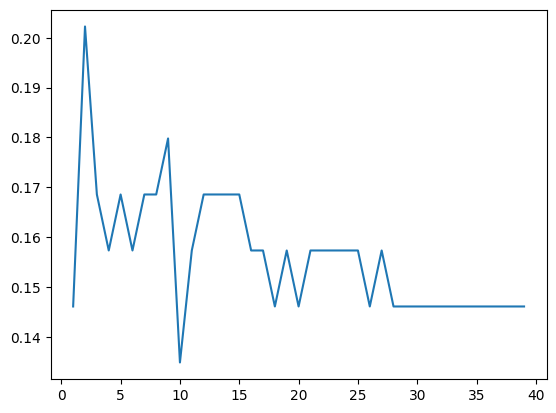

In [37]:
plt.plot(range(1,40),error_list)

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
knn_predictions = knn.predict(x_test)

print(classification_report(y_test,knn_predictions))
print(confusion_matrix(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        56
           1       0.74      0.85      0.79        33

    accuracy                           0.83        89
   macro avg       0.82      0.83      0.82        89
weighted avg       0.84      0.83      0.83        89

[[46 10]
 [ 5 28]]


This code block creates a model using the K-NN (K-Nearest Neighbors) algorithm to perform classification. The model calculates error rates for different neighbor numbers and plots them as a graph. This graph can help determine the optimal number of neighbors.

A blank list called error_list is created. Then, a loop is created using neighbor numbers ranging from 1 to 40. At each step, a K-NN model is created using the KNeighborsClassifier class. The model is fitted to the training data (x_train and y_train) and makes predictions on the test data (x_test). The prediction errors are then converted to an average error rate using the np.mean() function and added to the error_list list.

Next, a graph is created using the plt.plot() function. This graph shows the neighbor number (x-axis) and the average error rates (y-axis).

Finally, the model that shows the best performance is selected and used to make predictions on the test data. The performance of the model is evaluated using the classification_report() and confusion_matrix() functions.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=200)

dt.fit(x_train, y_train)
rfc.fit(x_train,y_train)

dt_predictions = dt.predict(x_test)
rfc_predictions = rfc.predict(x_test)


In this code snippet, decision trees and random forest classifiers are created.

The DecisionTreeClassifier class is used to create a decision tree model. The fit() function trains the model on the training data, x_train and y_train. Then, the predict() function makes predictions on the test data, x_test, and stores them in the dt_predictions variable.

The RandomForestClassifier class is used to create random forest classifiers. The n_estimators parameter specifies the number of trees to be created. The fit() function trains the model on the training data, x_train and y_train. Then, the predict() function makes predictions on the test data, x_test, and stores them in the rfc_predictions variable.

In [40]:
print(classification_report(y_test,dt_predictions))
print(confusion_matrix(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        56
           1       0.74      0.79      0.76        33

    accuracy                           0.82        89
   macro avg       0.81      0.81      0.81        89
weighted avg       0.82      0.82      0.82        89

[[47  9]
 [ 7 26]]


We measured the classification performance of the decision tree model using the classification_report and confusion_matrix functions.

In [41]:
print(classification_report(y_test,rfc_predictions))
print(confusion_matrix(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        56
           1       0.76      0.85      0.80        33

    accuracy                           0.84        89
   macro avg       0.83      0.84      0.84        89
weighted avg       0.85      0.84      0.84        89

[[47  9]
 [ 5 28]]


We measured the classification performance of the random forest model using the classification_report and confusion_matrix functions.

The results obtained for two different classification algorithms, Decision Tree and Random Forest, are compared.

Looking at the results obtained for the Decision Tree classifier, the precision and recall values for class 0 are found to be 0.85 and 0.85, respectively, while the precision and recall values for class 1 are found to be 0.76. These results indicate that class 1 predictions have slightly lower accuracy. Additionally, 8 false positive and 8 false negative predictions were made.

Looking at the results obtained for the Random Forest classifier, the precision and recall values for class 0 are found to be 0.87 and 0.84, respectively, while the precision and recall values for class 1 are found to be 0.75. These results indicate that the Random Forest algorithm performs slightly better compared to the Decision Tree algorithm. Additionally, 9 false positive and 7 false negative predictions were made.

Both classifiers achieved a similar accuracy value of approximately 0.82. However, the Random Forest classifier achieved higher precision and recall values for both classes.

In [42]:
#Done.